In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
import os


In [2]:
pwd

u'/home/rockingrichie1994'

In [3]:
app_train = pd.read_csv("application_train.csv")
app_test = pd.read_csv("application_test.csv")
cc_balance = pd.read_csv("credit_card_balance.csv")
prev_applications= pd.read_csv("previous_application.csv")
install_payments = pd.read_csv("installments_payments.csv")
pos_cash= pd.read_csv("POS_CASH_balance.csv")
bureau = pd.read_csv("bureau.csv")
bureau_bal = pd.read_csv("bureau_balance.csv")
sample_sub = pd.read_csv("sample_submission.csv")

In [4]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [5]:
missing_data(cc_balance)

,Total,Percent
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208
AMT_INST_MIN_REGULARITY,305236,7.948208
SK_DPD_DEF,0,0.000000


In [6]:
missing_data(prev_applications)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
DAYS_TERMINATION,673065,40.298129
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_FIRST_DRAWING,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129


In [7]:
prev_applications.drop(prev_applications.columns[21:],axis=1,inplace=True)

In [8]:
prev_applications.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
dtype: int64

In [9]:
install_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [10]:
ins = install_payments.groupby('SK_ID_PREV').mean()
ins.head()

,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
SK_ID_PREV,,,,,,,
1000001,158271.0,1.500000,1.500000,-253.000000,-269.000000,34221.712500,34221.712500
1000002,101962.0,1.250000,2.500000,-1555.000000,-1574.750000,9308.891250,9308.891250
1000003,252457.0,1.000000,2.000000,-64.000000,-79.333333,4951.350000,4951.350000
1000004,260094.0,1.142857,4.000000,-772.000000,-798.714286,4789.022143,4789.022143
1000005,176456.0,1.000000,5.818182,-1543.454545,-1551.909091,14703.210000,13365.609545


In [11]:
cc_balance.SK_ID_PREV.nunique()

104307

In [12]:
cc_bal= cc_balance.groupby('SK_ID_PREV').mean()

In [13]:
cc_bal = cc_bal.reset_index()
cc_bal = cc_bal.merge(right=ins.reset_index(),how='left',on='SK_ID_PREV')

In [14]:
cc_bal.head()

,SK_ID_PREV,SK_ID_CURR_x,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,SK_ID_CURR_y,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1000018,394447.0,-4.0,74946.285000,81000.000000,5400.000000,29478.996000,0.0,24078.996000,2594.088000,...,2.0000,0.0,0.0,394447.0,0.0,9.0,-78.352941,-78.705882,2073.994412,2073.994412
1,1000030,361282.0,-4.5,55991.064375,81562.500000,642.857143,17257.438125,0.0,19079.929286,2078.223750,...,1.8750,0.0,0.0,361282.0,0.0,10.0,-115.842105,-118.157895,2284.131316,2284.131316
2,1000031,131335.0,-8.5,52394.439375,149625.000000,12115.384615,28959.615000,0.0,23527.218462,2675.300625,...,3.6875,0.0,0.0,131335.0,0.0,16.5,-200.593750,-204.437500,11078.721563,11078.721563
3,1000035,436351.0,-4.0,0.000000,225000.000000,NaN,0.000000,NaN,NaN,0.000000,...,0.0000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000077,181153.0,-7.0,0.000000,94090.909091,NaN,0.000000,NaN,NaN,0.000000,...,0.0000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
missing_data(pos_cash)

,Total,Percent
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675
SK_DPD_DEF,0,0.000000
SK_DPD,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000
MONTHS_BALANCE,0,0.000000
SK_ID_CURR,0,0.000000
SK_ID_PREV,0,0.000000


In [16]:
pos_cash.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [17]:
pos = pos_cash.merge(right=cc_bal,how='left',on='SK_ID_PREV')

In [18]:
pos.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE_x,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD_x,SK_DPD_DEF_x,SK_ID_CURR_x,MONTHS_BALANCE_y,...,CNT_INSTALMENT_MATURE_CUM,SK_DPD_y,SK_DPD_DEF_y,SK_ID_CURR_y,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1803195,182943,-31,48.0,45.0,Active,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1715348,367990,-33,36.0,35.0,Active,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1784872,397406,-32,12.0,9.0,Active,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1903291,269225,-35,48.0,42.0,Active,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2341044,334279,-35,36.0,35.0,Active,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
pos.SK_ID_PREV.nunique()

936325

In [20]:
pos.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
MONTHS_BALANCE_x                     0
CNT_INSTALMENT                   26071
CNT_INSTALMENT_FUTURE            26087
NAME_CONTRACT_STATUS                 0
SK_DPD_x                             0
SK_DPD_DEF_x                         0
SK_ID_CURR_x                  10001358
MONTHS_BALANCE_y              10001358
AMT_BALANCE                   10001358
AMT_CREDIT_LIMIT_ACTUAL       10001358
AMT_DRAWINGS_ATM_CURRENT      10001358
AMT_DRAWINGS_CURRENT          10001358
AMT_DRAWINGS_OTHER_CURRENT    10001358
AMT_DRAWINGS_POS_CURRENT      10001358
AMT_INST_MIN_REGULARITY       10001358
AMT_PAYMENT_CURRENT           10001358
AMT_PAYMENT_TOTAL_CURRENT     10001358
AMT_RECEIVABLE_PRINCIPAL      10001358
AMT_RECIVABLE                 10001358
AMT_TOTAL_RECEIVABLE          10001358
CNT_DRAWINGS_ATM_CURRENT      10001358
CNT_DRAWINGS_CURRENT          10001358
CNT_DRAWINGS_OTHER_CURRENT    10001358
CNT_DRAWINGS_POS_CURRENT 

In [21]:
cc_bal.head()

,SK_ID_PREV,SK_ID_CURR_x,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,SK_ID_CURR_y,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1000018,394447.0,-4.0,74946.285000,81000.000000,5400.000000,29478.996000,0.0,24078.996000,2594.088000,...,2.0000,0.0,0.0,394447.0,0.0,9.0,-78.352941,-78.705882,2073.994412,2073.994412
1,1000030,361282.0,-4.5,55991.064375,81562.500000,642.857143,17257.438125,0.0,19079.929286,2078.223750,...,1.8750,0.0,0.0,361282.0,0.0,10.0,-115.842105,-118.157895,2284.131316,2284.131316
2,1000031,131335.0,-8.5,52394.439375,149625.000000,12115.384615,28959.615000,0.0,23527.218462,2675.300625,...,3.6875,0.0,0.0,131335.0,0.0,16.5,-200.593750,-204.437500,11078.721563,11078.721563
3,1000035,436351.0,-4.0,0.000000,225000.000000,NaN,0.000000,NaN,NaN,0.000000,...,0.0000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000077,181153.0,-7.0,0.000000,94090.909091,NaN,0.000000,NaN,NaN,0.000000,...,0.0000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
prev_applications = prev_applications.merge(right= cc_bal,how='left',on='SK_ID_PREV')

In [23]:
missing_data(prev_applications)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
AMT_PAYMENT_CURRENT,1608084,96.280117
CNT_DRAWINGS_POS_CURRENT,1608005,96.275387
AMT_DRAWINGS_ATM_CURRENT,1608005,96.275387
CNT_DRAWINGS_ATM_CURRENT,1608005,96.275387
CNT_DRAWINGS_OTHER_CURRENT,1608005,96.275387
AMT_DRAWINGS_POS_CURRENT,1608005,96.275387
AMT_DRAWINGS_OTHER_CURRENT,1608005,96.275387
DAYS_ENTRY_PAYMENT,1607947,96.271915


In [24]:
prev_applications.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
SK_ID_CURR_x                   1577279
MONTHS_BALANCE                 1577279
AMT_BALANCE                    1577279
AMT_CREDIT_LIMIT_ACTUAL        1577279
AMT_DRAWINGS_ATM_CURRENT 

In [25]:
prev_applications.drop(prev_applications.columns[20:],axis=1,inplace=True)

In [26]:
prev_applications.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC


In [27]:
prev_applications.drop(prev_applications.columns[13:15],axis=1,inplace=True)

In [28]:
prev_applications.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_DOWN_PAYMENT               895844
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_DOWN_PAYMENT              895844
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
dtype: int64

In [29]:
bu = bureau.groupby('SK_ID_CURR').mean()

In [30]:
app_train = app_train.merge(right=bu.reset_index(), how='left', on='SK_ID_CURR')
app_test = app_test.merge(right=bu.reset_index(), how='left', on='SK_ID_CURR')

In [31]:
pa = prev_applications.groupby('SK_ID_CURR').mean()
pa.head()

,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION
SK_ID_CURR,,,,,,,,,,
100001,1.369693e+06,3951.000,24835.50,23787.00,2520.0,24835.5,13.000000,1.0,0.104326,-1740.0
100002,1.038818e+06,9251.775,179055.00,179055.00,0.0,179055.0,9.000000,1.0,0.000000,-606.0
100003,2.281150e+06,56553.990,435436.50,484191.00,3442.5,435436.5,14.666667,1.0,0.050030,-1305.0
100004,1.564014e+06,5357.250,24282.00,20106.00,4860.0,24282.0,5.000000,1.0,0.212008,-815.0
100005,2.176837e+06,4813.200,22308.75,20076.75,4464.0,44617.5,10.500000,1.0,0.108964,-536.0


In [32]:
app_train = app_train.merge(right=pa.reset_index(), how='left', on='SK_ID_CURR')
app_test = app_test.merge(right=pa.reset_index(), how='left', on='SK_ID_CURR')

In [33]:
cc_balance.SK_ID_CURR.nunique()

103558

In [34]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1.038818e+06,9251.775,179055.00,179055.00,0.00,179055.00,9.000000,1.0,0.000000,-606.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,2.281150e+06,56553.990,435436.50,484191.00,3442.50,435436.50,14.666667,1.0,0.050030,-1305.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1.564014e+06,5357.250,24282.00,20106.00,4860.00,24282.00,5.000000,1.0,0.212008,-815.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,1.932462e+06,23651.175,272203.26,291695.50,34840.17,408304.89,14.666667,1.0,0.163412,-272.444444
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,2.157812e+06,12278.805,150530.25,166638.75,3390.75,150530.25,12.333333,1.0,0.159516,-1222.833333


In [35]:
missing_data(app_train)

,Total,Percent
AMT_ANNUITY_y,227502,73.981744
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


In [36]:
missing_data(app_test)

,Total,Percent
COMMONAREA_MODE,33495,68.716150
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MEDI,33495,68.716150
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
NONLIVINGAPARTMENTS_AVG,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_MODE,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302
LIVINGAPARTMENTS_AVG,32780,67.249302


In [87]:
cc_balance = cc_balance.groupby('SK_ID_CURR').mean()

In [88]:
app_train = app_train.groupby('SK_ID_CURR').mean()
app_train = app_train.reset_index()
app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
app_test = app_test.groupby('SK_ID_CURR').mean()
app_test = app_test.reset_index()
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,...,AMT_RECEIVABLE_PRINCIPAL_y,AMT_RECIVABLE_y,AMT_TOTAL_RECEIVABLE_y,CNT_DRAWINGS_ATM_CURRENT_y,CNT_DRAWINGS_CURRENT_y,CNT_DRAWINGS_OTHER_CURRENT_y,CNT_DRAWINGS_POS_CURRENT_y,CNT_INSTALMENT_MATURE_CUM_y,SK_DPD_y,SK_DPD_DEF_y
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,17255.559844,18101.079844,18101.079844,0.255556,0.239583,0.0,0.000000,18.719101,0.010417,0.010417
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,7680.352041,7968.609184,7968.609184,0.045455,2.387755,0.0,2.613636,19.547619,0.000000,0.000000
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
app_train = app_train.merge(right=cc_balance.reset_index(), how='left', on='SK_ID_CURR')

In [97]:
app_test = app_test.merge(right=cc_balance.reset_index(), how='left', on='SK_ID_CURR')

In [98]:
pos_cash.SK_ID_CURR.nunique()

337252

In [99]:
p_bal = pos_cash.groupby('SK_ID_CURR').mean()

In [100]:
app_train = app_train.merge(right=p_bal.reset_index(), how='left', on='SK_ID_CURR')
app_test = app_test.merge(right=p_bal.reset_index(), how='left', on='SK_ID_CURR')

In [101]:
app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,...,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD_x,SK_DPD_DEF_x,SK_ID_PREV,MONTHS_BALANCE_y,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD_y,SK_DPD_DEF_y
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,NaN,NaN,NaN,NaN,1.038818e+06,-10.000000,24.000000,15.000000,0.0,0.0
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,NaN,NaN,NaN,NaN,2.297665e+06,-43.785714,10.107143,5.785714,0.0,0.0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,NaN,NaN,NaN,NaN,1.564014e+06,-25.500000,3.750000,2.250000,0.0,0.0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,NaN,0.0,0.0,0.0,2.215853e+06,-9.619048,12.000000,8.650000,0.0,0.0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,NaN,NaN,NaN,NaN,2.041993e+06,-33.636364,15.333333,8.969697,0.0,0.0


In [102]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,...,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD_x,SK_DPD_DEF_x,SK_ID_PREV,MONTHS_BALANCE_y,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD_y,SK_DPD_DEF_y
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,NaN,NaN,NaN,NaN,1.584045e+06,-72.555556,4.000000,1.444444,0.777778,0.777778
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,NaN,NaN,NaN,NaN,2.495675e+06,-20.000000,11.700000,7.200000,0.000000,0.000000
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0.000000,18.719101,0.010417,0.010417,1.582866e+06,-29.555556,21.388889,15.305556,0.944444,0.000000
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,2.613636,19.547619,0.000000,0.000000,2.655057e+06,-41.967742,20.354839,10.129032,0.000000,0.000000
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,NaN,NaN,NaN,NaN,2.327930e+06,-21.000000,12.000000,5.846154,0.000000,0.000000


In [103]:
from pandas import Series,DataFrame

In [104]:
from sklearn.preprocessing import LabelEncoder

In [107]:
train_labels = app_train["TARGET"]

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train["TARGET"] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

('Training Features shape: ', (307511, 348))
('Testing Features shape: ', (48744, 347))


In [108]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

('Training Features shape: ', (307511, 348))
('Testing Features shape: ', (48744, 347))


In [109]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982694

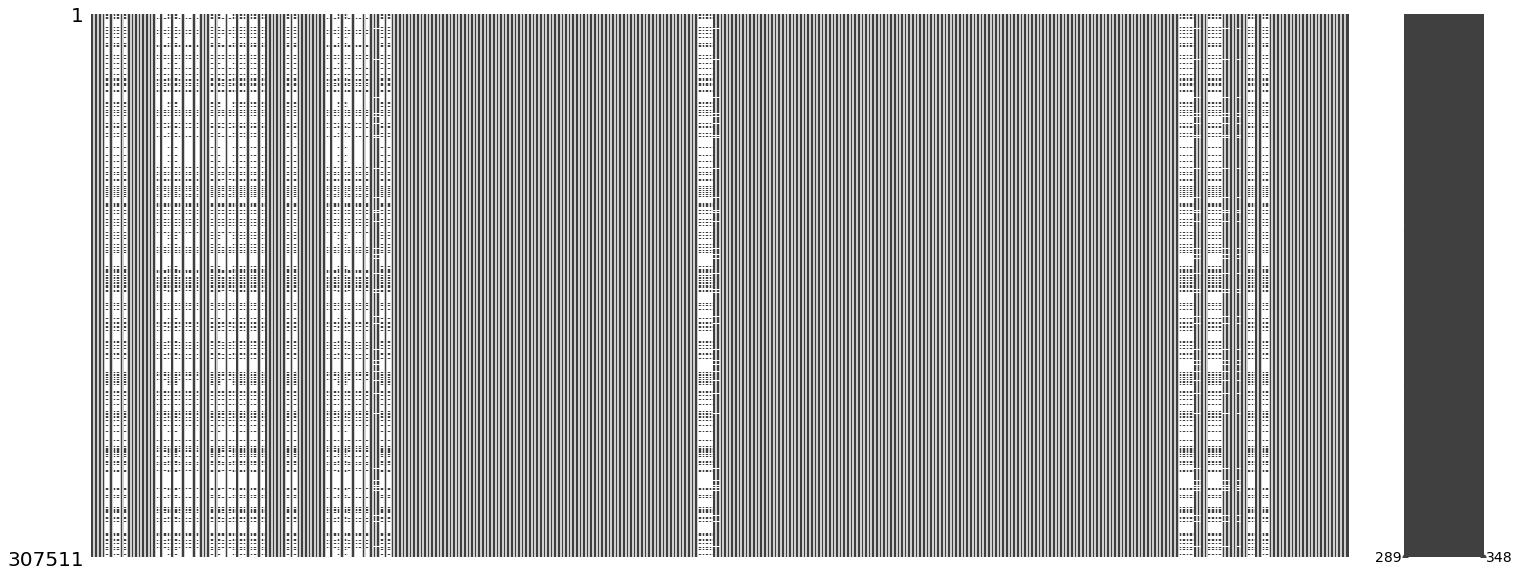

In [110]:
import missingno as msno
msno.matrix(app_train)
from sklearn.preprocessing import Imputer

In [111]:
imputer = Imputer(missing_values=np.nan, strategy='median', axis=0)

In [112]:
app_train[['AMT_ANNUITY_x']] = imputer.fit_transform(app_train[['AMT_ANNUITY_x']])
app_train[['AMT_GOODS_PRICE_x']] = imputer.fit_transform(app_train[['AMT_GOODS_PRICE_x']])
app_train[['DAYS_LAST_PHONE_CHANGE']] = imputer.fit_transform(app_train[['DAYS_LAST_PHONE_CHANGE']])
app_train[['OWN_CAR_AGE']] = imputer.fit_transform(app_train[['OWN_CAR_AGE']])
app_train[['CNT_FAM_MEMBERS']]= imputer.fit_transform(app_train[['CNT_FAM_MEMBERS']])
app_test[['AMT_ANNUITY_x']] = imputer.fit_transform(app_test[['AMT_ANNUITY_x']])
app_test[['AMT_GOODS_PRICE_x']] = imputer.fit_transform(app_test[['AMT_GOODS_PRICE_x']])
app_test[['DAYS_LAST_PHONE_CHANGE']] = imputer.fit_transform(app_test[['DAYS_LAST_PHONE_CHANGE']])
app_test[['OWN_CAR_AGE']] = imputer.fit_transform(app_test[['OWN_CAR_AGE']])
app_test[['CNT_FAM_MEMBERS']]= imputer.fit_transform(app_test[['CNT_FAM_MEMBERS']])

In [113]:
app_train.head()

,AMT_ANNUITY,AMT_ANNUITY_x,AMT_ANNUITY_y,AMT_APPLICATION,AMT_BALANCE,AMT_BALANCE_x,AMT_BALANCE_y,AMT_CREDIT_LIMIT_ACTUAL,AMT_CREDIT_LIMIT_ACTUAL_x,AMT_CREDIT_LIMIT_ACTUAL_y,...,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,TARGET
0,9251.775,24700.5,0.0,179055.00,NaN,0.0,NaN,NaN,0.0,NaN,...,0.0,0.0,1.0,0.9722,0.9722,0.9722,0.6192,0.6243,0.6341,1
1,56553.990,35698.5,0.0,435436.50,NaN,0.0,NaN,NaN,0.0,NaN,...,0.0,0.0,0.0,0.9851,0.9851,0.9851,0.7960,0.7987,0.8040,0
2,5357.250,6750.0,0.0,24282.00,NaN,0.0,NaN,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
3,23651.175,29686.5,0.0,272203.26,0.0,0.0,0.0,270000.0,270000.0,270000.0,...,0.0,0.0,1.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
4,12278.805,21865.5,0.0,150530.25,NaN,0.0,NaN,NaN,0.0,NaN,...,1.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0


In [114]:
app_train.fillna(value=0,inplace= True)
app_test.fillna(value=0,inplace=True)

In [115]:
correlations = app_train.corr()['TARGET'].sort_values()

In [116]:
print('Most Positive Correlations: \n', correlations)

('Most Positive Correlations: \n', EXT_SOURCE_2                                        -0.159030
EXT_SOURCE_3                                        -0.119572
DAYS_BIRTH                                          -0.078239
EXT_SOURCE_1                                        -0.064698
NAME_EDUCATION_TYPE_Higher education                -0.056593
CODE_GENDER_F                                       -0.054704
FLOORSMAX_AVG                                       -0.049839
FLOORSMAX_MEDI                                      -0.049720
FLOORSMAX_MODE                                      -0.049458
NAME_INCOME_TYPE_Pensioner                          -0.046209
ORGANIZATION_TYPE_XNA                               -0.045987
DAYS_EMPLOYED                                       -0.044932
EMERGENCYSTATE_MODE_No                              -0.042201
TOTALAREA_MODE                                      -0.041037
YEARS_BEGINEXPLUATATION_MEDI                        -0.040983
YEARS_BEGINEXPLUATATION_AVG        

In [117]:
app_train.columns

Index([u'AMT_ANNUITY', u'AMT_ANNUITY_x', u'AMT_ANNUITY_y', u'AMT_APPLICATION',
       u'AMT_BALANCE', u'AMT_BALANCE_x', u'AMT_BALANCE_y',
       u'AMT_CREDIT_LIMIT_ACTUAL', u'AMT_CREDIT_LIMIT_ACTUAL_x',
       u'AMT_CREDIT_LIMIT_ACTUAL_y',
       ...
       u'WEEKDAY_APPR_PROCESS_START_THURSDAY',
       u'WEEKDAY_APPR_PROCESS_START_TUESDAY',
       u'WEEKDAY_APPR_PROCESS_START_WEDNESDAY', u'YEARS_BEGINEXPLUATATION_AVG',
       u'YEARS_BEGINEXPLUATATION_MEDI', u'YEARS_BEGINEXPLUATATION_MODE',
       u'YEARS_BUILD_AVG', u'YEARS_BUILD_MEDI', u'YEARS_BUILD_MODE',
       u'TARGET'],
      dtype='object', length=348)

In [118]:
x = app_train.iloc[:,:-1].values

In [119]:
y = app_train.iloc[:,-1].values

In [126]:
import lightgbm as lgb
d_train = lgb.Dataset(x, label=y)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 100
params['min_data'] = 50
params['max_depth'] = 10

clf = lgb.train(params, d_train, 100)

In [127]:
y_pred=clf.predict(app_test)

In [128]:
my_submission = pd.DataFrame({'SK_ID_CURR': app_test.SK_ID_CURR, 'TARGET':y_pred})

In [129]:
my_submission.to_csv('submission2.csv', index=False)

In [130]:
my_submission

,SK_ID_CURR,TARGET
0,100001,0.077901
1,100005,0.086272
2,100013,0.070683
3,100028,0.071960
4,100038,0.089959
5,100042,0.078711
6,100057,0.070131
7,100065,0.077174
8,100066,0.069991
9,100067,0.087412
